# LV 2. 

과제 진행하기

https://school.programmers.co.kr/learn/courses/30/lessons/176962

**문제 설명**

    과제를 받은 루는 다음과 같은 순서대로 과제를 하려고 계획을 세웠습니다.

    과제는 시작하기로 한 시각이 되면 시작합니다.
    새로운 과제를 시작할 시각이 되었을 때, 기존에 진행 중이던 과제가 있다면 진행 중이던 과제를 멈추고 새로운 과제를 시작합니다.
    진행중이던 과제를 끝냈을 때, 잠시 멈춘 과제가 있다면, 멈춰둔 과제를 이어서 진행합니다.
    만약, 과제를 끝낸 시각에 새로 시작해야 되는 과제와 잠시 멈춰둔 과제가 모두 있다면, 새로 시작해야 하는 과제부터 진행합니다.
    멈춰둔 과제가 여러 개일 경우, 가장 최근에 멈춘 과제부터 시작합니다.
    과제 계획을 담은 이차원 문자열 배열 plans가 매개변수로 주어질 때, 과제를 끝낸 순서대로 이름을 배열에 담아 return 하는 solution 함수를 완성해주세요.
    
    
**제한 사항**

    3 ≤ plans의 길이 ≤ 1,000
    plans의 원소는 [name, start, playtime]의 구조로 이루어져 있습니다.
    name : 과제의 이름을 의미합니다.
    2 ≤ name의 길이 ≤ 10
    name은 알파벳 소문자로만 이루어져 있습니다.
    name이 중복되는 원소는 없습니다.
    start : 과제의 시작 시각을 나타냅니다.
    "hh:mm"의 형태로 "00:00" ~ "23:59" 사이의 시간값만 들어가 있습니다.
    모든 과제의 시작 시각은 달라서 겹칠 일이 없습니다.
    과제는 "00:00" ... "23:59" 순으로 시작하면 됩니다. 즉, 시와 분의 값이 작을수록 더 빨리 시작한 과제입니다.
    playtime : 과제를 마치는데 걸리는 시간을 의미하며, 단위는 분입니다.
    1 ≤ playtime ≤ 100
    playtime은 0으로 시작하지 않습니다.
    배열은 시간순으로 정렬되어 있지 않을 수 있습니다.
    진행중이던 과제가 끝나는 시각과 새로운 과제를 시작해야하는 시각이 같은 경우 진행중이던 과제는 끝난 것으로 판단합니다.
    
    
**입출력 예**

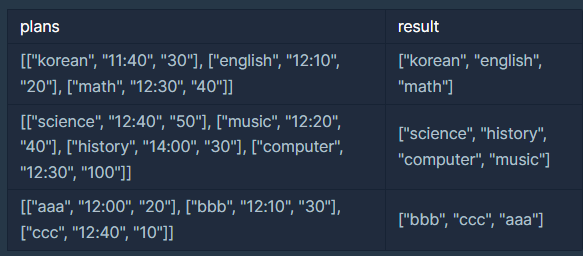

**입출력 예 설명**

    입출력 예 #1
    "korean", "english", "math"순으로 과제를 시작합니다. "korean" 과제를 "11:40"에 시작하여 30분 후인 "12:10"에 마치고, 즉시 "english" 과제를 시작합니다. 20분 후인 "12:30"에 "english" 과제를 마치고, 즉시 "math" 과제를 시작합니다. 40분 후인 "01:10"에 "math" 과제를 마칩니다. 따라서 "korean", "english", "math" 순으로 과제를 끝내므로 차례대로 배열에 담아 반환합니다.

    입출력 예 #2
    "music", "computer", "science", "history" 순으로 과제를 시작합니다.
    
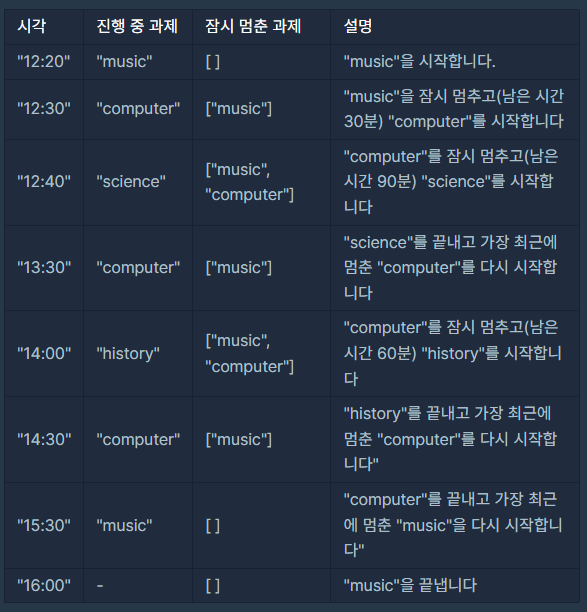

    따라서 ["science", "history", "computer", "music"] 순서로 과제를 마칩니다.

    입출력 예 #3
    설명 생략

In [50]:
def solution(plans):
    answer, stack = [], []
    plans.sort(key=lambda x: x[1])
    
    for subject, start, time in plans:
        h, m = map(int, start.split(':'))
        start = 60*h+m
        time = int(time)

        if stack:
            pre_subject, pre_start, pre_time = stack.pop()
            time_term = start-pre_start

            if time_term < pre_time:
                stack.append((pre_subject, pre_start, pre_time-time_term))
            else:
                answer.append(pre_subject)
                time_term = time_term-pre_time

                while stack and time_term:
                    pre_subject, pre_start, pre_time = stack.pop()

                    if time_term < pre_time:
                        stack.append((pre_subject, pre_start, pre_time-time_term))
                        break
                    else:
                        answer.append(pre_subject)
                        time_term = time_term - pre_time
        stack.append((subject, start, time))

    answer.extend([sub for sub,st,ti in stack[::-1]])
    return answer

In [51]:
print(solution([["korean", "11:40", "30"], ["english", "12:10", "20"], ["math", "12:30", "40"]]))
print(solution([["science", "12:40", "50"], ["music", "12:20", "40"], ["history", "14:00", "30"], ["computer", "12:30", "100"]]))
print(solution([["aaa", "12:00", "20"], ["bbb", "12:10", "30"], ["ccc", "12:40", "10"]]))

['korean', 'english', 'math']
['science', 'history', 'computer', 'music']
['bbb', 'ccc', 'aaa']


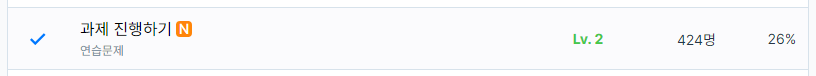

In [37]:
plans = [["science", "12:40", "50"], ["music", "12:20", "40"], ["history", "14:00", "30"], ["computer", "12:30", "100"]]

In [63]:
plans = [["science", "12:40", "50"], ["music", "12:20", "40"], ["history", "14:00", "30"], ["computer", "12:30", "100"]]
plans.sort(key=lambda x: x[1])

answer, stack = [], []

for subject, start, time in plans:
    h, m = map(int, start.split(':'))
    start = 60*h+m
    time = int(time)
    
    if stack:
        pre_subject, pre_start, pre_time = stack.pop()
        time_term = start-pre_start
        
        if time_term < pre_time:
            stack.append((pre_subject, pre_start, pre_time-time_term))
        else:
            answer.append(pre_subject)
            time_term = time_term-pre_time
            
            while stack and time_term:
                pre_subject, pre_start, pre_time = stack.pop()
                
                if time_term < pre_time:
                    stack.append((pre_subject, pre_start, pre_time-time_term))
                    break
                else:
                    answer.append(pre_subject)
                    time_term = time_term - pre_time
    stack.append((subject, start, time))

print(stack)
answer.extend([sub for sub,st,ti in stack[::-1]])
answer

[('music', 740, 30), ('computer', 750, 60), ('history', 840, 30)]


['science', 'history', 'computer', 'music']

**다른 사람 풀이**

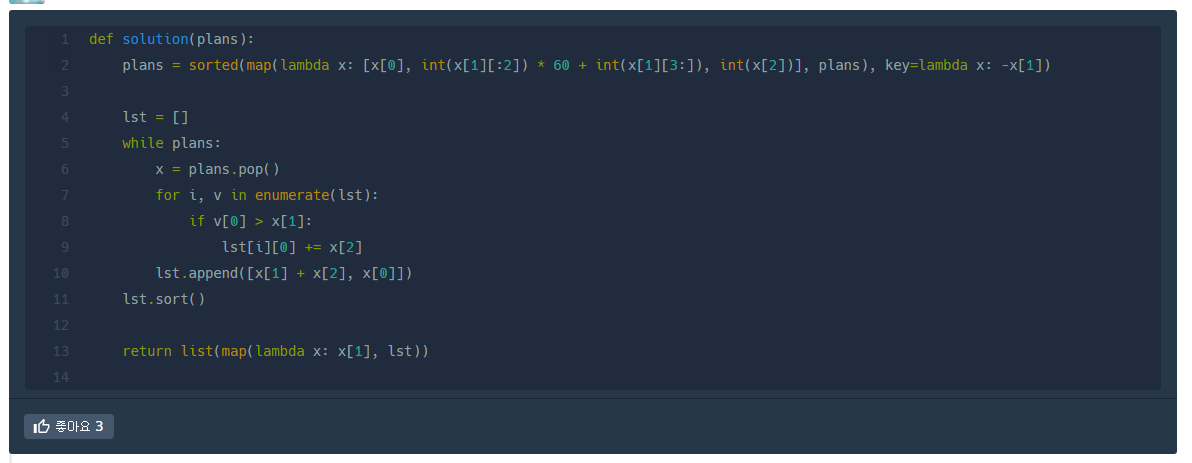

In [35]:
plans = [["science", "12:40", "50"], ["music", "12:20", "40"], ["history", "14:00", "30"], ["computer", "12:30", "100"]]

sorted(map(lambda x: [x[0], int(x[1][:2])]))

{'science': [760, 810, 50],
 'music': [740, 780, 40],
 'history': [840, 870, 30],
 'computer': [750, 850, 100]}

In [20]:
min(time_dict.values())

[740, 780, 40]

{'science': [760, 810, 50],
 'music': [780, 40],
 'history': [840, 870, 30],
 'computer': [850, 100]}